***NYC Bike Trips Analysis. Let me see where this goes***

In [42]:
#Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [43]:
df = pd.read_csv('../input/kaggle/nyc_biketrips.csv', usecols=['start_time', 'stop_time', 'start_station_id',
       'end_station_id','user_type', 'bike_id', 'gender','age', 'trip_duration'], parse_dates=True)
df.head()

,start_time,stop_time,start_station_id,end_station_id,user_type,bike_id,gender,age,trip_duration
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,460,Subscriber,25805,male,32,12.97
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,360,Subscriber,17258,male,24,12.45
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,368,Subscriber,19692,male,39,8.28
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,3076,Subscriber,28285,male,28,7.75
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,3400,Subscriber,21000,female,51,8.05


In [45]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['stop_time'] = pd.to_datetime(df['stop_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595334 entries, 0 to 1595333
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   start_time        1595334 non-null  datetime64[ns]
 1   stop_time         1595334 non-null  datetime64[ns]
 2   start_station_id  1595334 non-null  int64         
 3   end_station_id    1595334 non-null  int64         
 4   user_type         1595334 non-null  object        
 5   bike_id           1595334 non-null  int64         
 6   gender            1595334 non-null  object        
 7   age               1595334 non-null  int64         
 8   trip_duration     1595334 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 109.5+ MB


In [46]:
df.describe()

,start_time,stop_time,start_station_id,end_station_id,bike_id,age,trip_duration
count,1595334,1595334,1.595334e+06,1.595334e+06,1.595334e+06,1.595334e+06,1.595334e+06
mean,2018-05-16 00:55:24.459198720,2018-05-16 01:11:50.985054464,1.548185e+03,1.537103e+03,2.620161e+04,3.785808e+01,1.643375e+01
min,2018-05-01 00:00:11,2018-05-01 00:04:35,7.200000e+01,7.200000e+01,1.452900e+04,1.600000e+01,1.020000e+00
25%,2018-05-07 20:04:24.500000,2018-05-07 20:18:59,3.800000e+02,3.790000e+02,2.062600e+04,2.900000e+01,6.120000e+00
50%,2018-05-15 11:46:20.500000,2018-05-15 12:01:59.500000,5.020000e+02,5.010000e+02,2.786500e+04,3.500000e+01,1.027000e+01
75%,2018-05-24 07:44:10.500000,2018-05-24 07:57:37.500000,3.232000e+03,3.232000e+03,3.102600e+04,4.600000e+01,1.767000e+01
max,2018-05-31 23:59:59,2018-08-12 10:14:03,3.686000e+03,3.686000e+03,3.369000e+04,6.500000e+01,1.117817e+05
std,NaN,NaN,1.427931e+03,1.426690e+03,5.784637e+03,1.102715e+01,2.848633e+02


In [47]:
df['trip_duration'] = round(df['trip_duration'] * 60)
df

,start_time,stop_time,start_station_id,end_station_id,user_type,bike_id,gender,age,trip_duration
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,460,Subscriber,25805,male,32,778.0
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,360,Subscriber,17258,male,24,747.0
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,368,Subscriber,19692,male,39,497.0
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,3076,Subscriber,28285,male,28,465.0
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,3400,Subscriber,21000,female,51,483.0
...,...,...,...,...,...,...,...,...,...
1595329,2018-05-01 00:01:00,2018-05-01 00:08:02,3493,3351,Subscriber,30645,male,32,421.0
1595330,2018-05-01 00:00:43,2018-05-01 00:05:40,532,3096,Subscriber,16980,male,33,297.0
1595331,2018-05-01 00:00:40,2018-05-01 00:08:03,3263,546,Subscriber,27255,male,49,443.0
1595332,2018-05-01 00:00:35,2018-05-01 00:12:16,507,3458,Subscriber,29357,male,22,700.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595334 entries, 0 to 1595333
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   start_time        1595334 non-null  datetime64[ns]
 1   stop_time         1595334 non-null  datetime64[ns]
 2   start_station_id  1595334 non-null  int64         
 3   end_station_id    1595334 non-null  int64         
 4   user_type         1595334 non-null  object        
 5   bike_id           1595334 non-null  int64         
 6   gender            1595334 non-null  object        
 7   age               1595334 non-null  int64         
 8   trip_duration     1595334 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 109.5+ MB


In [50]:
df['duration'] = df['stop_time'] - df['start_time']

In [51]:
df['duration'].describe()

count                      1595334
mean     0 days 00:16:26.525856027
std      0 days 04:44:51.799834528
min                0 days 00:01:01
25%                0 days 00:06:07
50%                0 days 00:10:17
75%                0 days 00:17:40
max               77 days 15:01:41
Name: duration, dtype: object

In [52]:
df['duration'].idxmax()

246454

In [53]:
df.iloc[246454]

start_time          2018-05-26 19:12:22
stop_time           2018-08-12 10:14:03
start_station_id                   3584
end_station_id                     3599
user_type                      Customer
bike_id                           26820
gender                             male
age                                  30
trip_duration                 6706901.0
duration               77 days 15:01:41
Name: 246454, dtype: object

In [9]:
df = df[df['duration'] <= '1 days']

In [41]:
df = df.reset_index(drop=True)
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1594935    False
1594936    False
1594937    False
1594938    False
1594939    False
Length: 1594940, dtype: bool

<Axes: xlabel='age', ylabel='Count'>

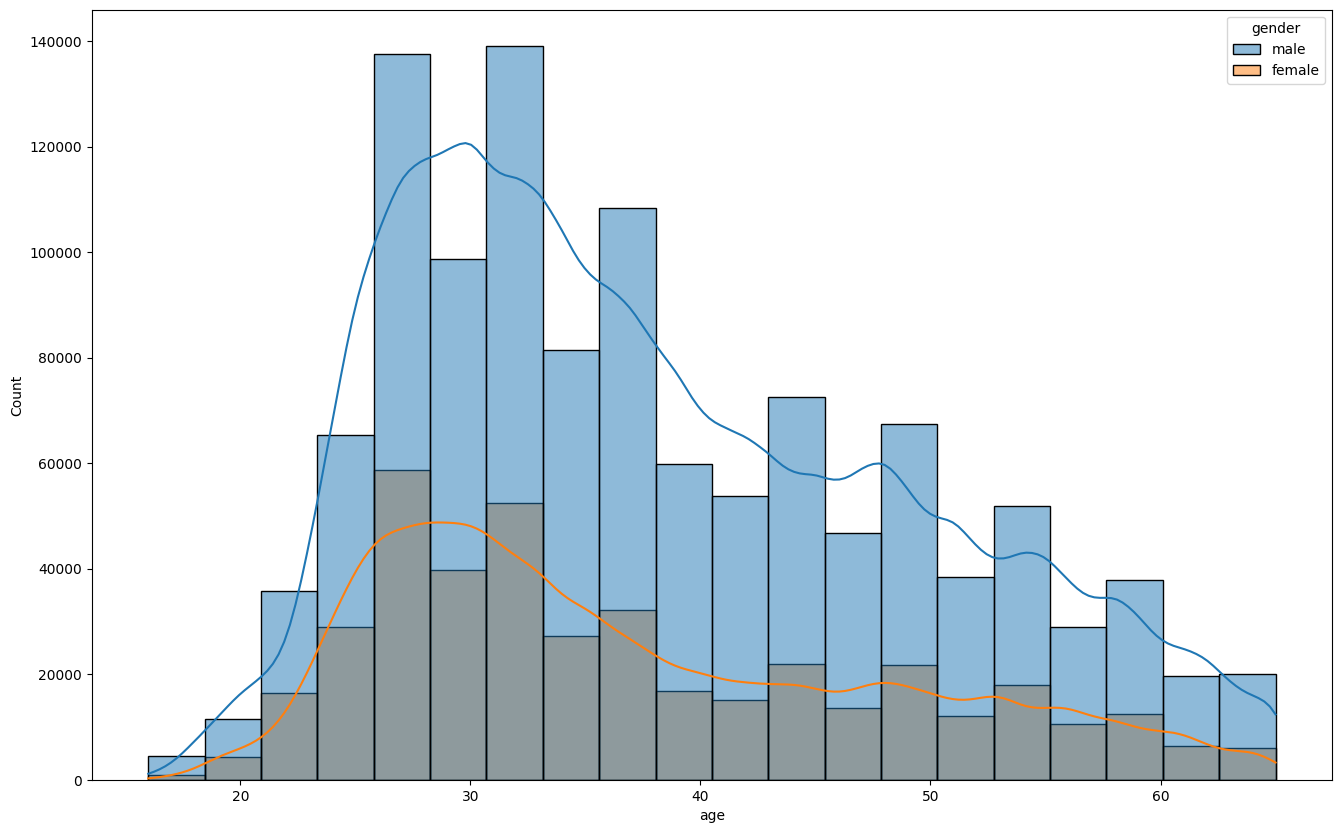

In [22]:
plt.figure(figsize=(16,10))
sns.histplot(data=df, x='age', hue='gender', bins=20, kde=True)

<Axes: xlabel='user_type', ylabel='count'>

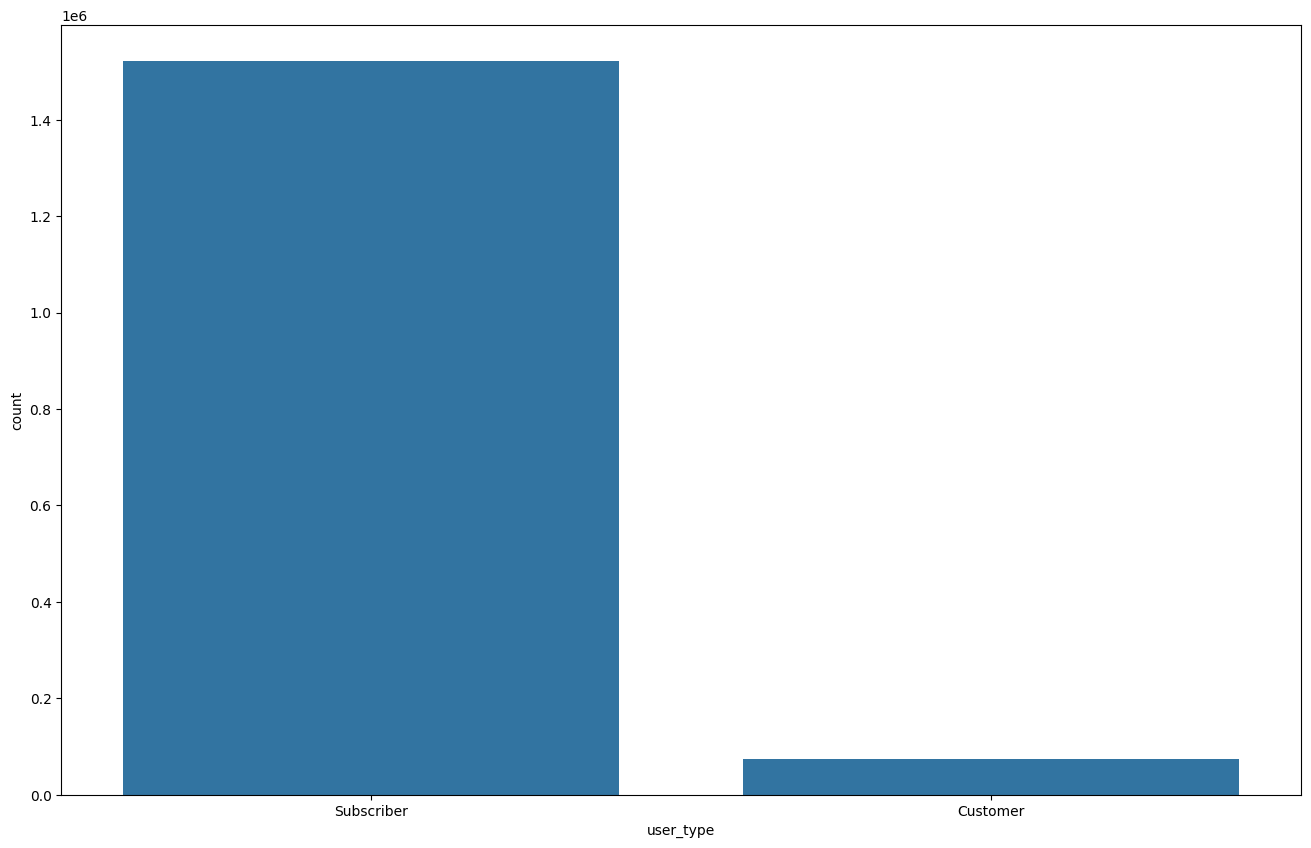

In [25]:
plt.figure(figsize=(16,10))
sns.countplot(data=df, x = 'user_type')

In [40]:
df.describe()

,start_time,stop_time,start_station_id,end_station_id,bike_id,age,trip_duration,duration
count,1594940,1594940,1.594940e+06,1.594940e+06,1.594940e+06,1.594940e+06,1.594940e+06,1594940
mean,2018-05-16 00:54:56.562965504,2018-05-16 01:08:50.138619392,1.547996e+03,1.536855e+03,2.620193e+04,3.785886e+01,8.330746e+02,0 days 00:13:53.575654883
min,2018-05-01 00:00:11,2018-05-01 00:04:35,7.200000e+01,7.200000e+01,1.452900e+04,1.600000e+01,6.100000e+01,0 days 00:01:01
25%,2018-05-07 20:04:14.500000,2018-05-07 20:18:10.750000128,3.800000e+02,3.790000e+02,2.063200e+04,2.900000e+01,3.670000e+02,0 days 00:06:07
50%,2018-05-15 11:45:36.500000,2018-05-15 11:59:44,5.020000e+02,5.010000e+02,2.786500e+04,3.500000e+01,6.160000e+02,0 days 00:10:16
75%,2018-05-24 07:43:42.249999872,2018-05-24 07:56:30,3.232000e+03,3.232000e+03,3.102600e+04,4.600000e+01,1.059000e+03,0 days 00:17:40
max,2018-05-31 23:59:59,2018-06-01 14:37:59,3.686000e+03,3.686000e+03,3.369000e+04,6.500000e+01,8.627300e+04,0 days 23:57:53
std,NaN,NaN,1.427890e+03,1.426637e+03,5.784513e+03,1.102723e+01,1.194721e+03,0 days 00:19:54.721091545


In [39]:
df['start_time'].dt.month.unique()

array([5])